In [2]:
%matplotlib inline

In [3]:
import pytpc
import pytpc.simulation
from pytpc.constants import pi, degrees

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
data_path = '../../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [5]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')

#no 'iffy' events
#p_indices = labels.loc[(labels['label'] == 'p') & (labels['iffy'] != 0)]['evt_id'].index[:]

#all events
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

Int64Index([  12,   24,   31,   55,   60,   65,   67,   70,   72,   78,
            ...
             976,  978,  980,  984,  989,  993,  994,  998, 1000, 1001],
           dtype='int64', length=215)


In [6]:
print(labels['label'].value_counts())

j     564
p     215
c     128
pp     61
pc     34
Name: label, dtype: int64


In [7]:
labels2 = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
print(labels2['label'].value_counts())

j     564
p     215
c     128
pp     61
pc     34
Name: label, dtype: int64


In [8]:
i = 0

12


(0.0, 2000.0)

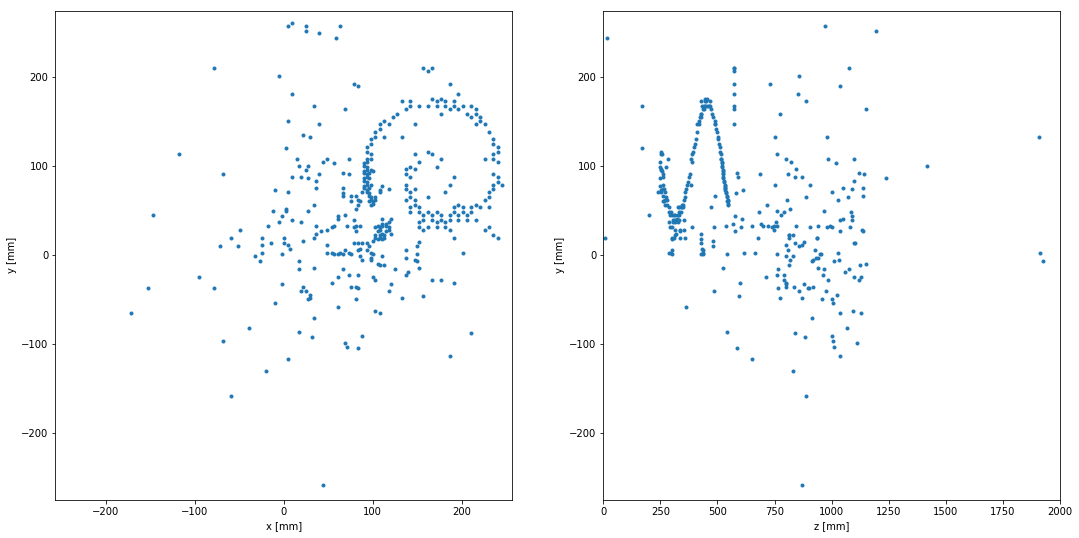

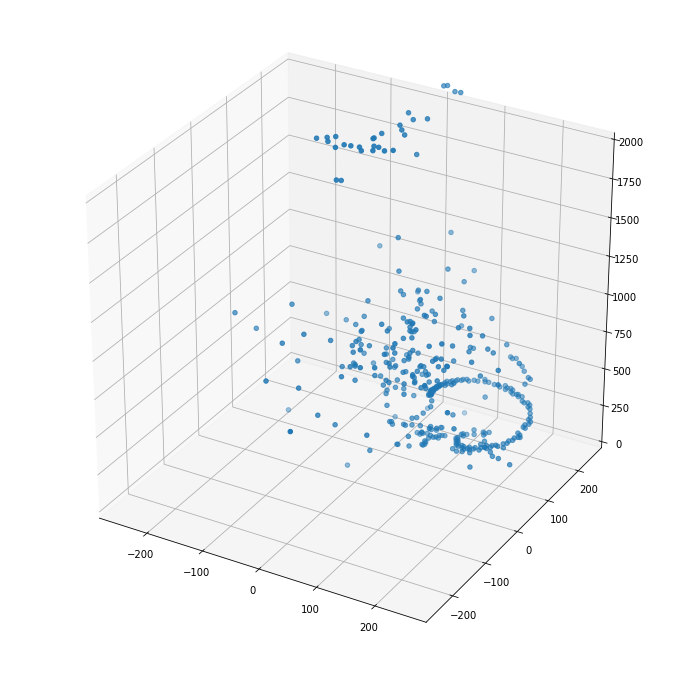

In [9]:
#i += 1

print(p_indices[i])
#specific event
evt = file[p_indices[i]]

xyzs = evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
#xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].plot(xyzs[:,0], xyzs[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
#ax[0].set_title('xy')
ax[0].set_xlim((-275, 275))
ax[0].set_ylim((-275, 275))

#######################################################################################################################
ax[1].plot(xyzs[:,2], xyzs[:,1], '.')
#ax[1].axis('equal')
        
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')
#ax[1].set_title('zy')
ax[1].set_xlim((0, 2000))
ax[1].set_ylim((-275, 275))

#fig.savefig('../../plots/thesis/noise_run_0130_evt_83.png')

#######################################################################################################################
#plt.ylim((-275, 275))
fig2 = plt.figure(figsize=(12,12))
ax2 = fig2.add_subplot(111, projection="3d")
ax2 = fig2.add_subplot(111, projection="3d")
ax2.scatter(xyzs[:,0], xyzs[:,1], xyzs[:,2])
ax2.axis('equal')
ax2.set_xlim(-275., 275.)
ax2.set_ylim(-275., 275.)
ax2.set_zlim(0., 2000.)

24


(-275, 275)

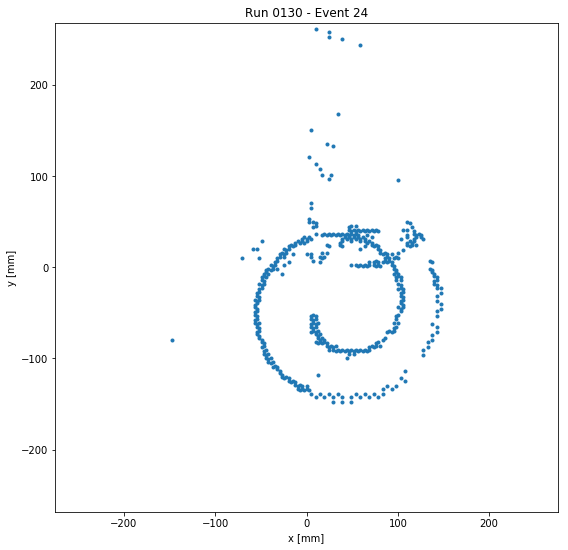

In [10]:
i += 1

print(p_indices[i])
#specific event
evt = file[p_indices[i]]

#xyzs = evt.xyzs(peaks_only=True, drift_vel=np.array([-0.0603573 , -0.55178666, -5.14005679]), clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.plot(xyzs[:,0], xyzs[:,1], '.')
ax.axis('equal')
        
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_title('Run 0130 - Event ' + str(p_indices[i]))
ax.set_xlim((-275, 275))
ax.set_ylim((-275, 275))

#plt.savefig('../plots/events/event_examples/run_0130_evt_' + str(p_indices[i]) + '.pdf')

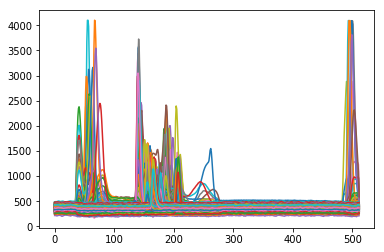

In [11]:
for trace in evt.traces['data']:
    plt.plot(trace)
    #print(len(trace))

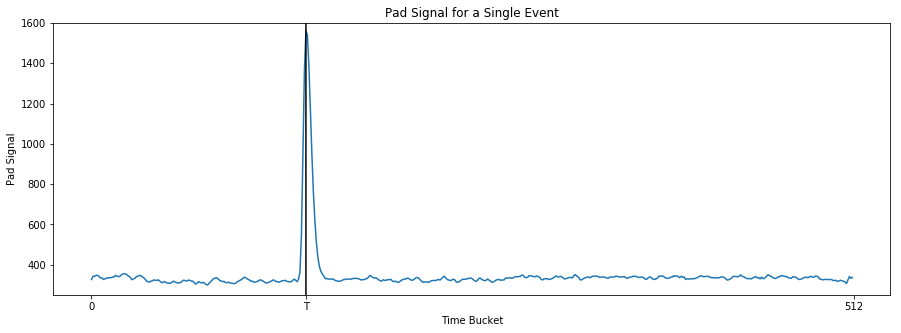

In [19]:
plt.figure(figsize = (15,5))
trace = evt.traces['data'][0]
plt.plot(trace)
peakIndex = int(np.where(trace == max(trace))[0])

plt.xlabel('Time Bucket')
plt.ylabel('Pad Signal')
plt.title('Pad Signal for a Single Event')

line = range(200, max(trace) + 100)
plt.plot([peakIndex]*len(line), line, c='black')

plt.xticks([0, peakIndex, 512], ['0', 'T', '512'])

plt.ylim(250, 1600)

#plt.savefig('../../plots/results/thesis/padSignal.png')